In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display  import display
from   pylab  import rcParams

### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
dfrose=pd.read_csv("Rose.csv")
print(dfrose.head(5))
print(dfrose.tail(5))

  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0
    YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0


In [3]:
dfrose1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)
print(dfrose1.head(5))
print(dfrose1.tail(5))

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64
YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64


In [4]:
dfrose2 = pd.read_csv("Rose.csv")

In [5]:
date = pd.date_range(start='1/1/1980', end='8/8/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
dfrose2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
dfrose2.head(10)

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31
5,1980-06,168.0,1980-06-30
6,1980-07,118.0,1980-07-31
7,1980-08,129.0,1980-08-31
8,1980-09,205.0,1980-09-30
9,1980-10,147.0,1980-10-31


In [7]:
df = dfrose2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head(5)

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [8]:
df.tail(5)

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [23]:
df.isnull().sum()

Rose    2
dtype: int64

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### imputation of missing value using standard pandas interpolate method

In [27]:
df.interpolate(method='pad')['Rose']
df.tail(15)

,Rose
Time_Stamp,
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,45.0
1994-08-31,45.0
1994-09-30,46.0
1994-10-31,51.0
1994-11-30,63.0
1994-12-31,84.0
1995-01-31,30.0


In [28]:
df.isnull().sum()

Rose    0
dtype: int64

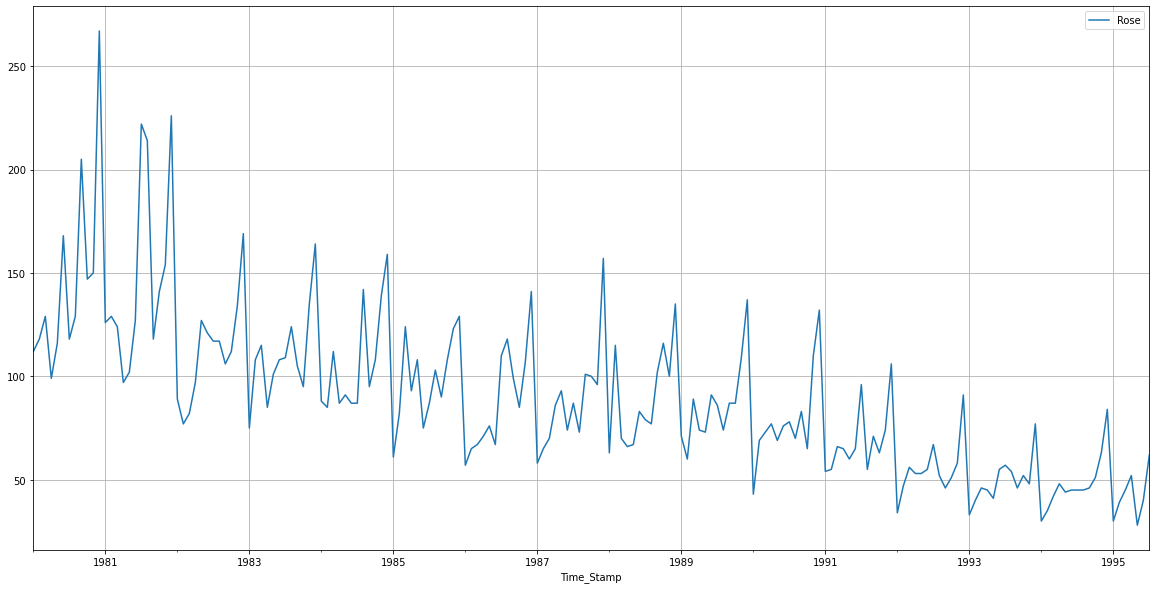

In [29]:
df.plot(figsize=(20,10))
plt.grid();

In [30]:
round(df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Rose,187.0,89.909,39.244,28.0,62.5,85.0,111.0,267.0


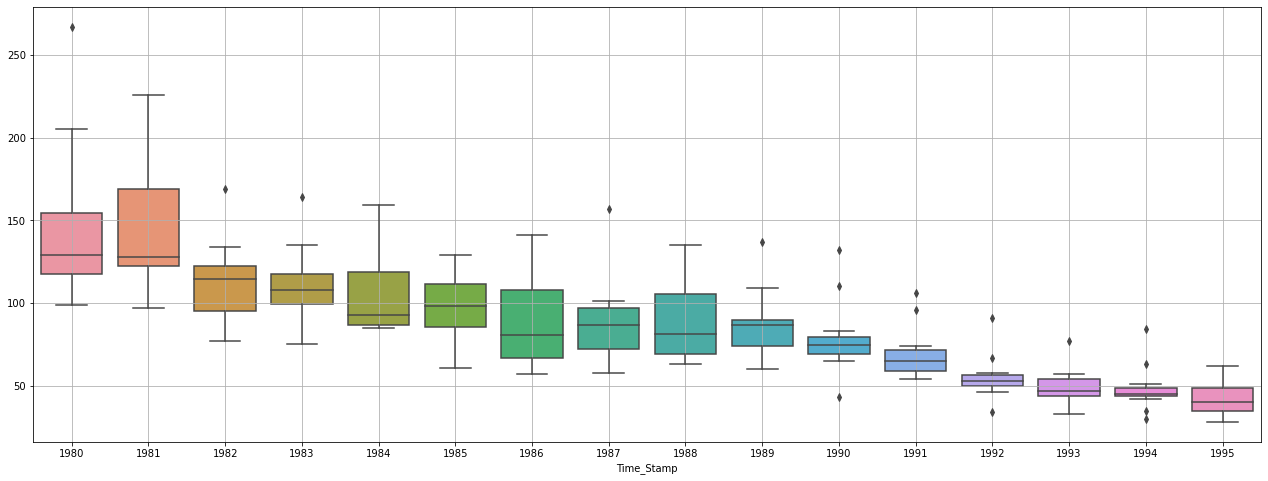

In [31]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

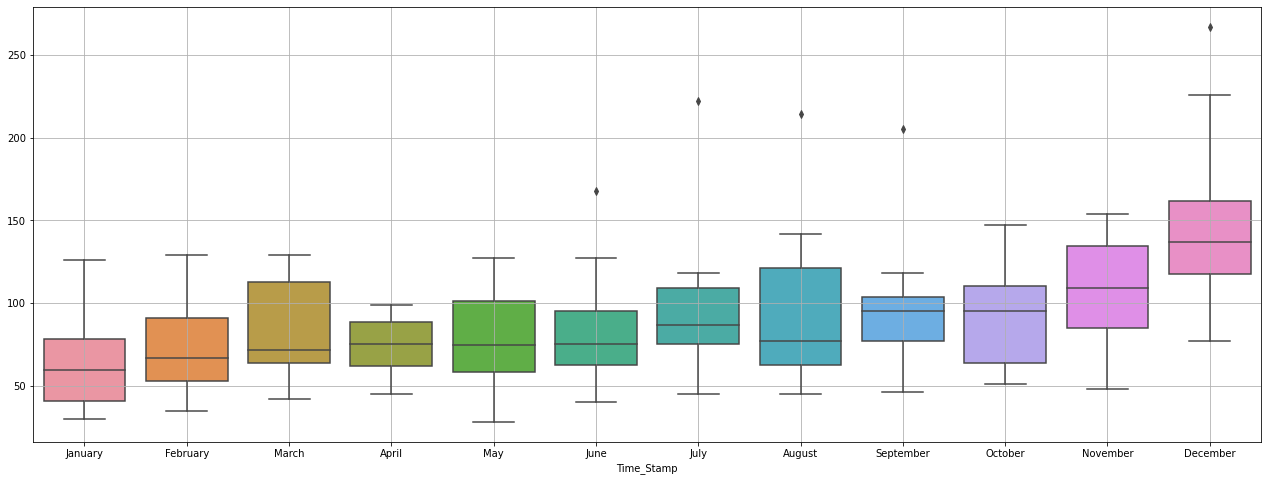

In [32]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [33]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


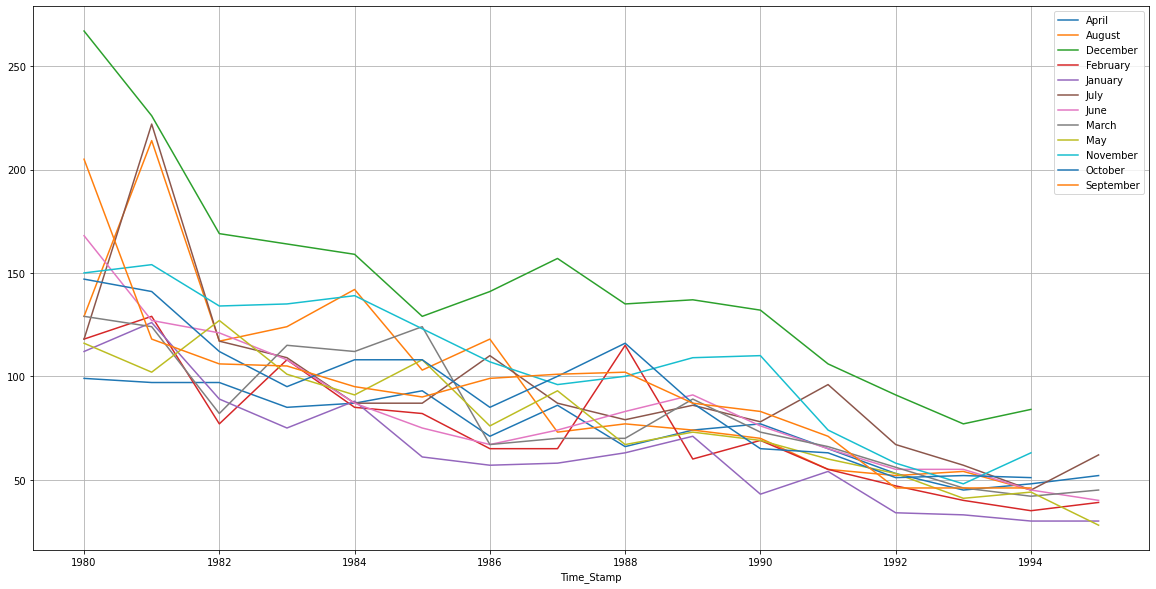

In [34]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Decomposition of Time Series "Additive" and "multiplicative" model.

In [35]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

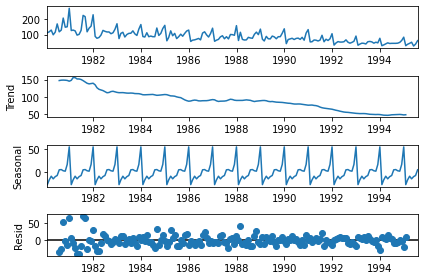

In [36]:
decomposition = seasonal_decompose(df, model="additive")
decomposition.plot();

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.903092
1980-02-29   -17.431663
1980-03-31    -9.279878
1980-04-30   -15.092378
1980-05-31   -10.190592
1980-06-30    -7.672735
1980-07-31     4.880241
1980-08-31     5.460797
1980-09-30     2.780241
1980-10-31     1.877464
1980-11-30    16.852464
1980-12-31    55.719130
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.963575
1980-08-31   -24.585797
1980-09-30    53.844759
1980-10-31    -2.960797
1980-11-30   -14.269130
1980-12-31    66.15

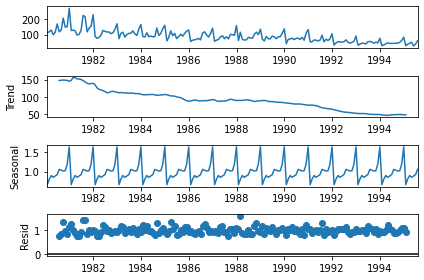

In [38]:
decomposition = seasonal_decompose(df, model="multiplicative")
decomposition.plot();

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670182
1980-02-29    0.806224
1980-03-31    0.901278
1980-04-30    0.854154
1980-05-31    0.889531
1980-06-30    0.924099
1980-07-31    1.057682
1980-08-31    1.035066
1980-09-30    1.017753
1980-10-31    1.022688
1980-11-30    1.192494
1980-12-31    1.628848
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758514
1980-08-31    0.841382
1980-09-30    1.357534
1980-10-31    0.970661
1980-11-30    0.853274
1980-12-31    1.129506
Name: resid, dtype:

### 3. Split the data into training and test. The test data should start in 1991.

In [40]:
train    =   df[df.index < '1991'] 
test     =   df[df.index >='1991']

In [41]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [42]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



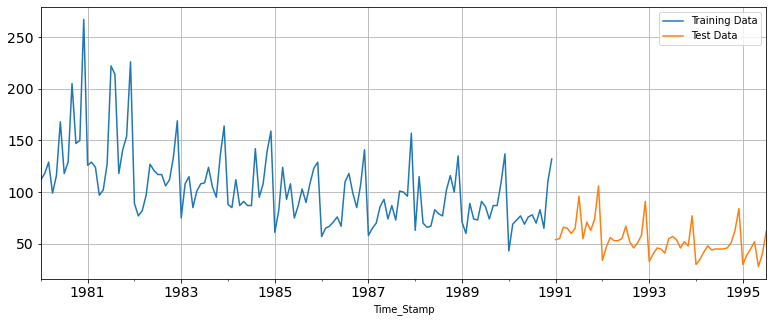

In [43]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### 1. Exponential Smoothing Model 

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [45]:
SES_train = train.copy()
SES_test = test.copy()

In [46]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [47]:
model_SES_autofit = model_SES.fit(optimized=True)

In [48]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


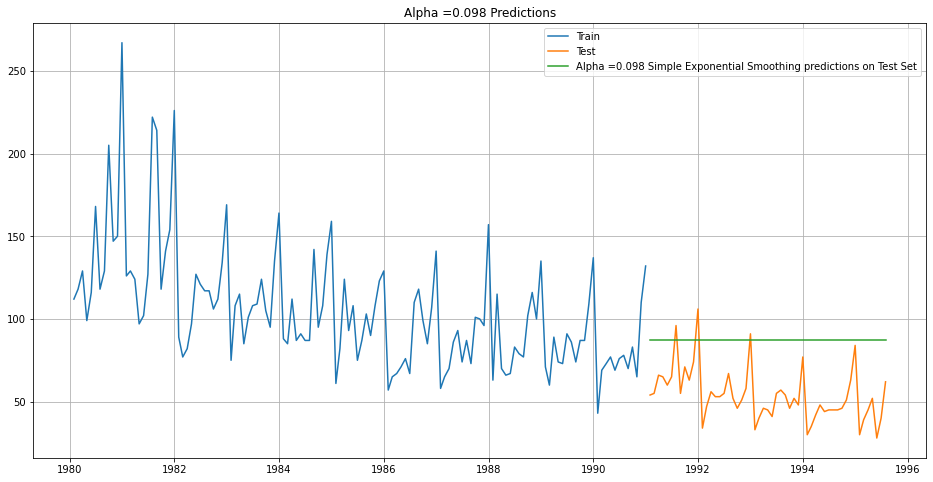

In [50]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [51]:
## Test Data

rmse1_SESmodel = mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse1_SESmodel))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [60]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [rmse1_SESmodel]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDf_SES])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889


In [61]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_SES1 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_SES1

,Alpha Values,Train RMSE,Test RMSE


In [62]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [63]:
rmse1_SESmodel_train_i = mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
rmse1_SESmodel_test_i = mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
resultsDf_SES1 = resultsDf_SES1.append({'Alpha Values':i,'Train RMSE':rmse1_SESmodel_train_i ,
                                        'Test RMSE':rmse1_SESmodel_test_i}, ignore_index=True)

In [64]:
resultsDf_SES1.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.9,37.482782,77.159094


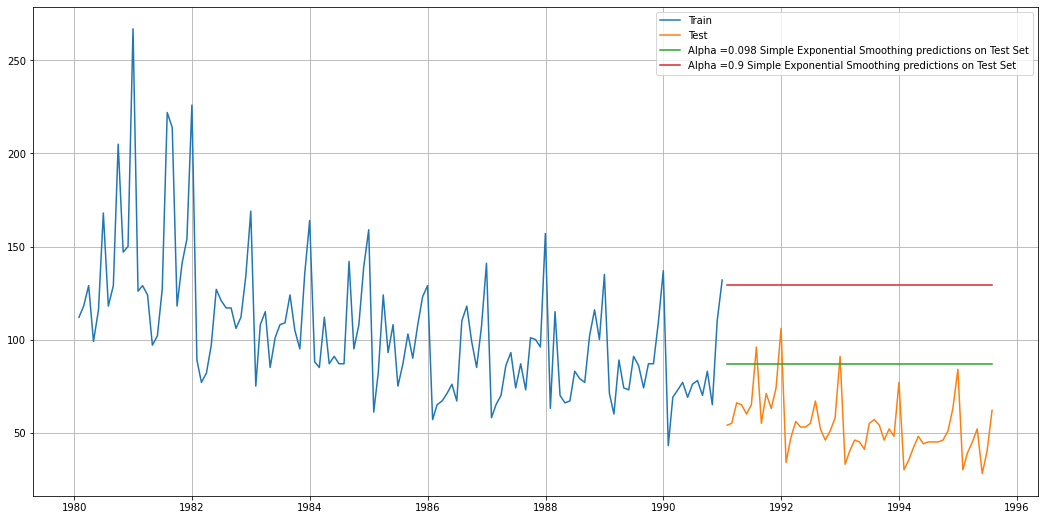

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', i], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [66]:
resultsSES_final = pd.DataFrame({'Test RMSE':resultsDf_SES1.sort_values(by=['Test RMSE'],ascending=True).values[0][2]}
                           ,index=['Alpha=0.9,SES'])
resultsSES_final

,Test RMSE
"Alpha=0.9,SES",77.159094


In [67]:
resultsDF1 = pd.concat([resultsDF1,resultsSES_final])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094


### 2. Double Exponential Smoothing Model

In [68]:
DES_train = train.copy()
DES_test = test.copy()

In [69]:
model_DES = Holt(DES_train['Rose'])

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [70]:
model_DES_autofit = model_DES.fit(optimized=True)

In [71]:
model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Rose,predict
Time_Stamp,,
1991-01-31,54.0,73.259732
1991-02-28,55.0,72.767150
1991-03-31,66.0,72.274569
1991-04-30,65.0,71.781987
1991-05-31,60.0,71.289405


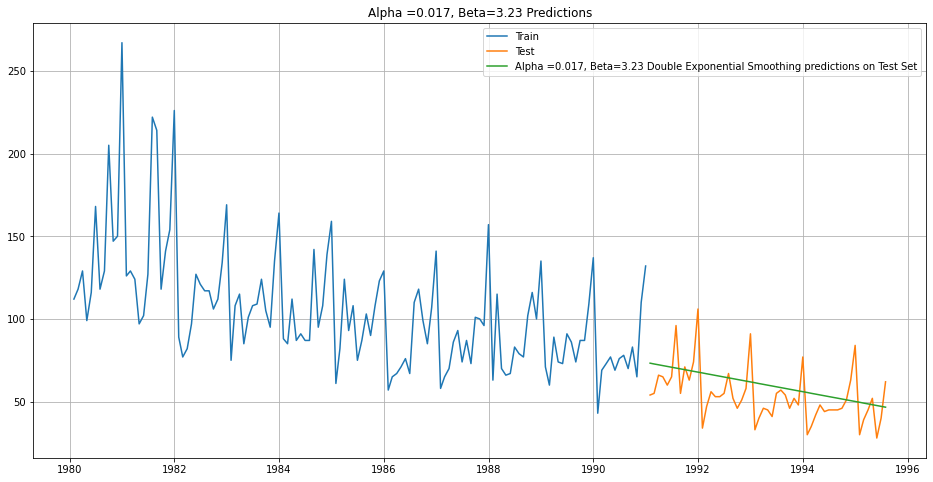

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.017, Beta=3.23 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.017, Beta=3.23 Predictions');

In [74]:
## Test Data

rmse1_DESmodel = mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0.017, Beta= 3.23 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse1_DESmodel))

For Alpha =0.017, Beta= 3.23 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.715


In [75]:
resultsDES_2 = pd.DataFrame({'Test RMSE':[rmse1_DESmodel]}, index=['Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsDES_2])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112


In [76]:
## First we will define an empty dataframe to store our values from the loop

resultsDES2 =pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDES2

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [77]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse2_DESmodel_train = mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse2_DESmodel_test = mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDES2 = resultsDES2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse2_DESmodel_train
                                          ,'Test RMSE':rmse2_DESmodel_test}, ignore_index=True)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

In [78]:
resultsDES2

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.591922
1,0.3,0.4,37.393239,358.775361
2,0.3,0.5,38.888325,451.834692
3,0.3,0.6,40.280670,536.978631
4,0.3,0.7,41.403518,601.640840
...,...,...,...,...
59,1.0,0.6,51.831610,801.704637
60,1.0,0.7,54.497039,841.917005
61,1.0,0.8,57.365879,853.989973
62,1.0,0.9,60.474309,834.735365


In [79]:
resultsDES2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.591922
8,0.4,0.3,36.749123,339.330850
1,0.3,0.4,37.393239,358.775361
16,0.5,0.3,37.433314,394.296935
24,0.6,0.3,38.348984,439.320331


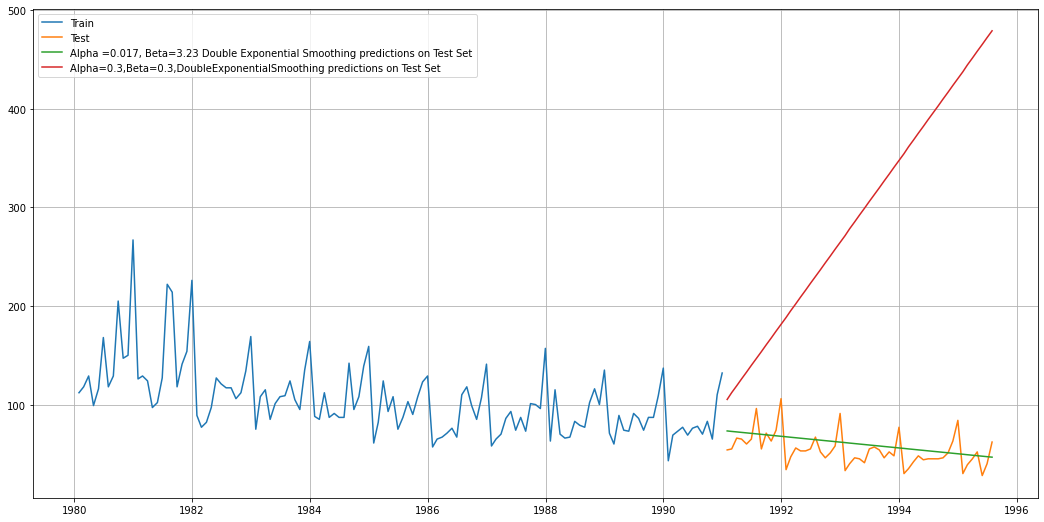

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.017, Beta=3.23 Double Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [81]:
resultsDES_final = pd.DataFrame({'Test RMSE': [resultsDES2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsDES_final])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922


### 3. Triple Exponential Smoothing Model 

In [82]:
TES_train = train.copy()
TES_test = test.copy()

In [83]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [84]:
model_TES_autofit = model_TES.fit()

In [85]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.689174
1991-02-28,55.0,64.129166
1991-03-31,66.0,69.856436
1991-04-30,65.0,60.877474
1991-05-31,60.0,68.237072


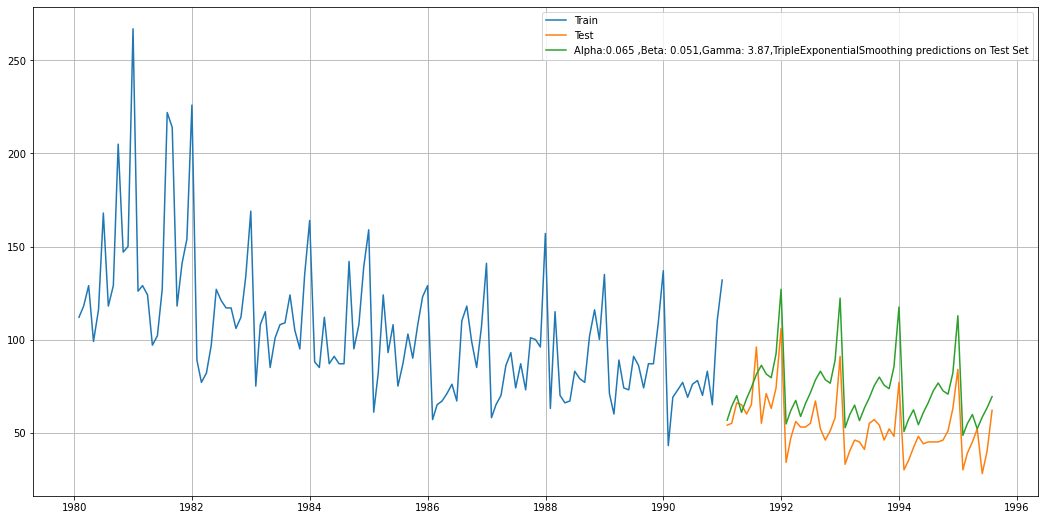

In [87]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha:0.065 ,Beta: 0.051,Gamma: 3.87,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [88]:
## Test Data

rmse_modelTES = mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha:0.065 ,Beta: 0.051,Gamma: 3.87, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelTES))

For Alpha:0.065 ,Beta: 0.051,Gamma: 3.87, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.046


In [89]:
resultsTES = pd.DataFrame({'Test RMSE': [rmse_modelTES]}
                           ,index=['Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsTES])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",21.045505


#### Trying different values of Alpha, Beta and Gamma for Triple Exponential Smoothing Model

In [90]:
## First we will define an empty dataframe to store our values from the loop

resultsTES2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsTES2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [91]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_modelTES2_train = mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_modelTES2_test = mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsTES2 = resultsTES2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_modelTES2_train,'Test RMSE':rmse_modelTES2_test}
                                                 , ignore_index=True)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_10120/35685411.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  T

In [92]:
resultsTES2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,27.217969,19.074245
1,0.3,0.3,0.4,27.399095,11.185630
2,0.3,0.3,0.5,27.928512,30.542692
3,0.3,0.3,0.6,28.888611,63.601214
4,0.3,0.3,0.7,30.568635,122.452533
...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,9603.639171
508,1.0,1.0,0.7,30724.126331,23029.955433
509,1.0,1.0,0.8,1218.755446,9626.707516
510,1.0,1.0,0.9,14150.253251,9691.904819


In [93]:
resultsTES2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
8,0.3,0.4,0.3,28.111886,10.951007
1,0.3,0.3,0.4,27.399095,11.185630
69,0.4,0.3,0.8,32.601491,12.613096
16,0.3,0.5,0.3,29.087520,14.395909
131,0.5,0.3,0.6,32.144773,16.703934


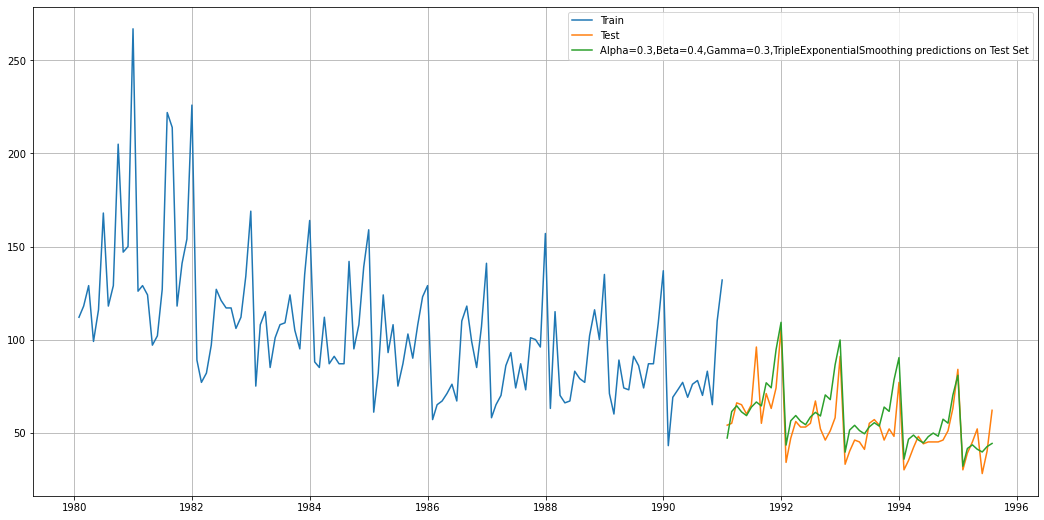

In [94]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.3,0.4,0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

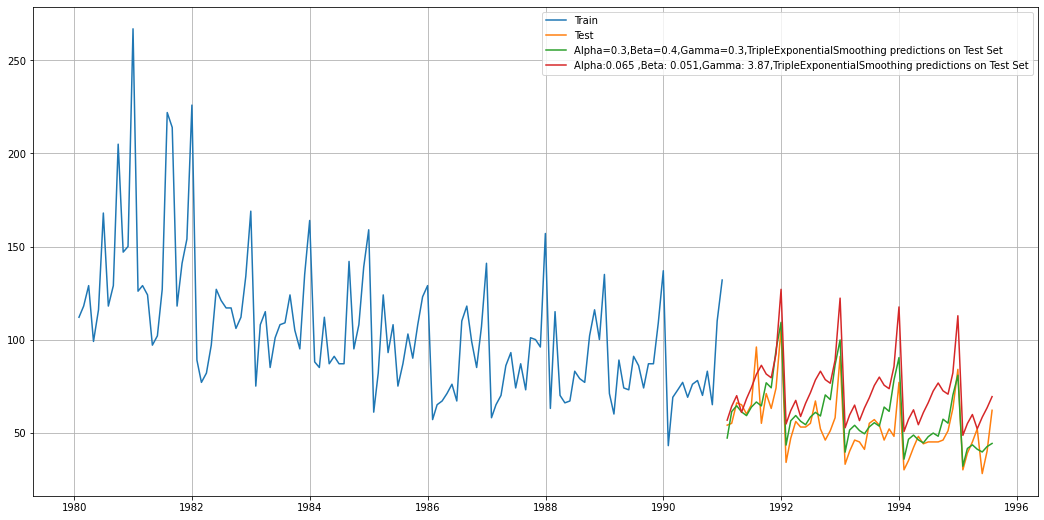

In [95]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.3,0.4,0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha:0.065 ,Beta: 0.051,Gamma: 3.87,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [96]:
resultsTES_final = pd.DataFrame({'Test RMSE': [resultsTES2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsTES_final])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",21.045505
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.951007


### 4. Linear Regression Model

In [97]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [98]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [99]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr = LinearRegression()

In [102]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

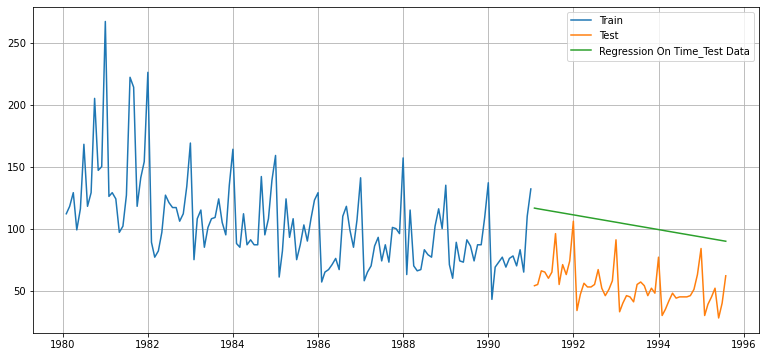

In [103]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [104]:
## Test Data - RMSE

rmse_modelLR = mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelLR))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.451


In [105]:
results_LR = pd.DataFrame({'Test RMSE': [rmse_modelLR]},index=['RegressionOnTime'])
resultsDF1 = pd.concat([resultsDF1, results_LR])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",21.045505
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.951007
RegressionOnTime,51.451050


### 5. Naive Forecast Models

In [106]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [107]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

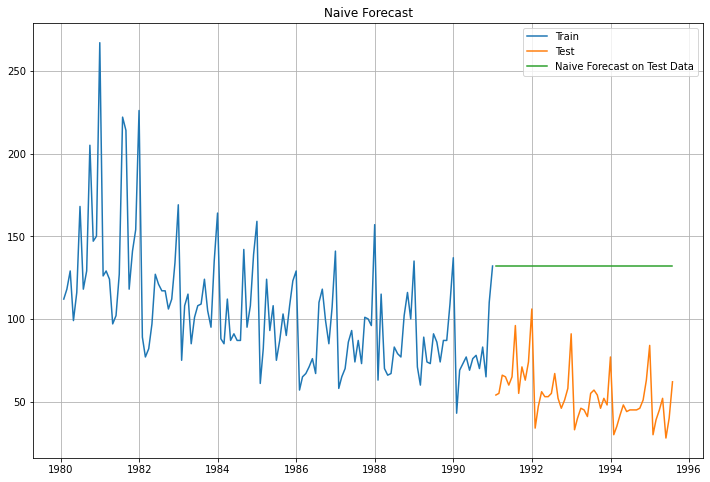

In [108]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [109]:
## Test Data - RMSE

rmse_Naive_test= mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_Naive_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


In [110]:
results_Naive = pd.DataFrame({'Test RMSE': [rmse_Naive_test]},index=['NaiveModel'])

resultsDF1 = pd.concat([resultsDF1, results_Naive])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",21.045505
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.951007
RegressionOnTime,51.451050
NaiveModel,79.738550


### 6. Simple Average Models

In [111]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [112]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


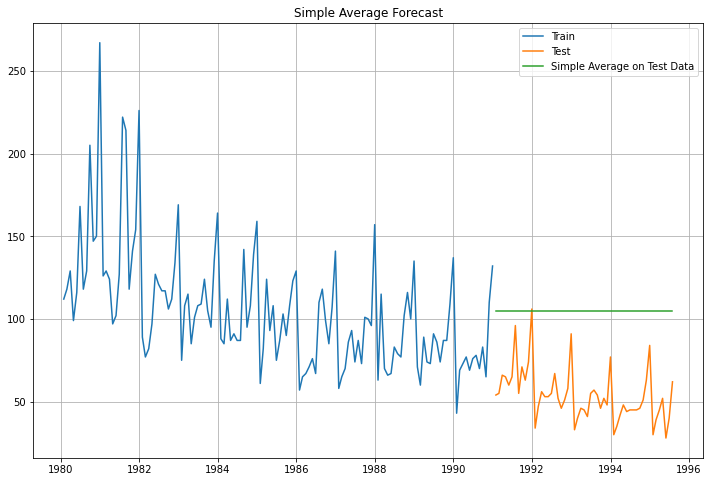

In [113]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [114]:
## Test Data - RMSE 

rmse_Simple_Avg = mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_Simple_Avg))

For Simple Average forecast on the Test Data,  RMSE is 53.481


In [115]:
results_Simple_Avg = pd.DataFrame({'Test RMSE': [rmse_Simple_Avg]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, results_Simple_Avg])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
SimpleAverageModel,53.480857


### 7. Model 7: Moving Average Model

In [116]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [117]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


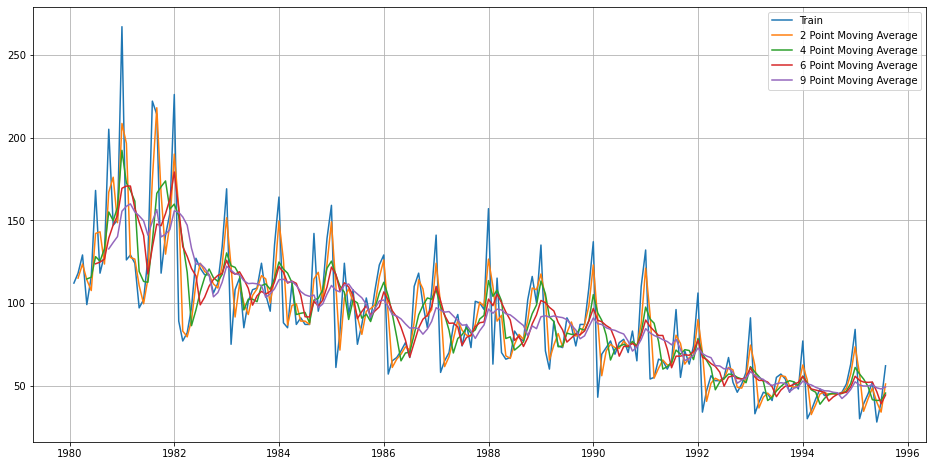

In [118]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [119]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

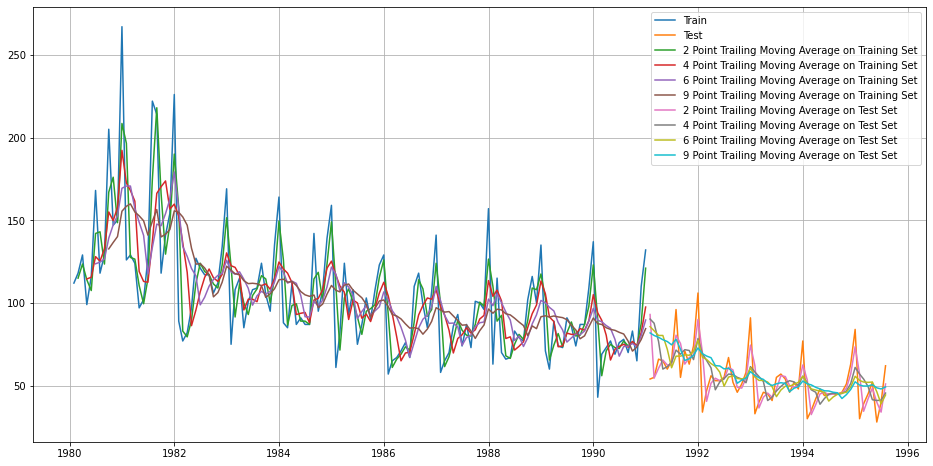

In [120]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [121]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_modelMA_test_2 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_modelMA_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_modelMA_test_4 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_modelMA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_modelMA_test_6 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_modelMA_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_modelMA_test_9 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_modelMA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.731 


In [122]:
results_MA = pd.DataFrame({'Test RMSE': [rmse_modelMA_test_2,rmse_modelMA_test_4
                                          ,rmse_modelMA_test_6,rmse_modelMA_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDF1 = pd.concat([resultsDF1, results_MA])
resultsDF1

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
"Alpha=0.9,SES",77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",21.045505
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.951007
RegressionOnTime,51.451050
NaiveModel,79.738550
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.455221


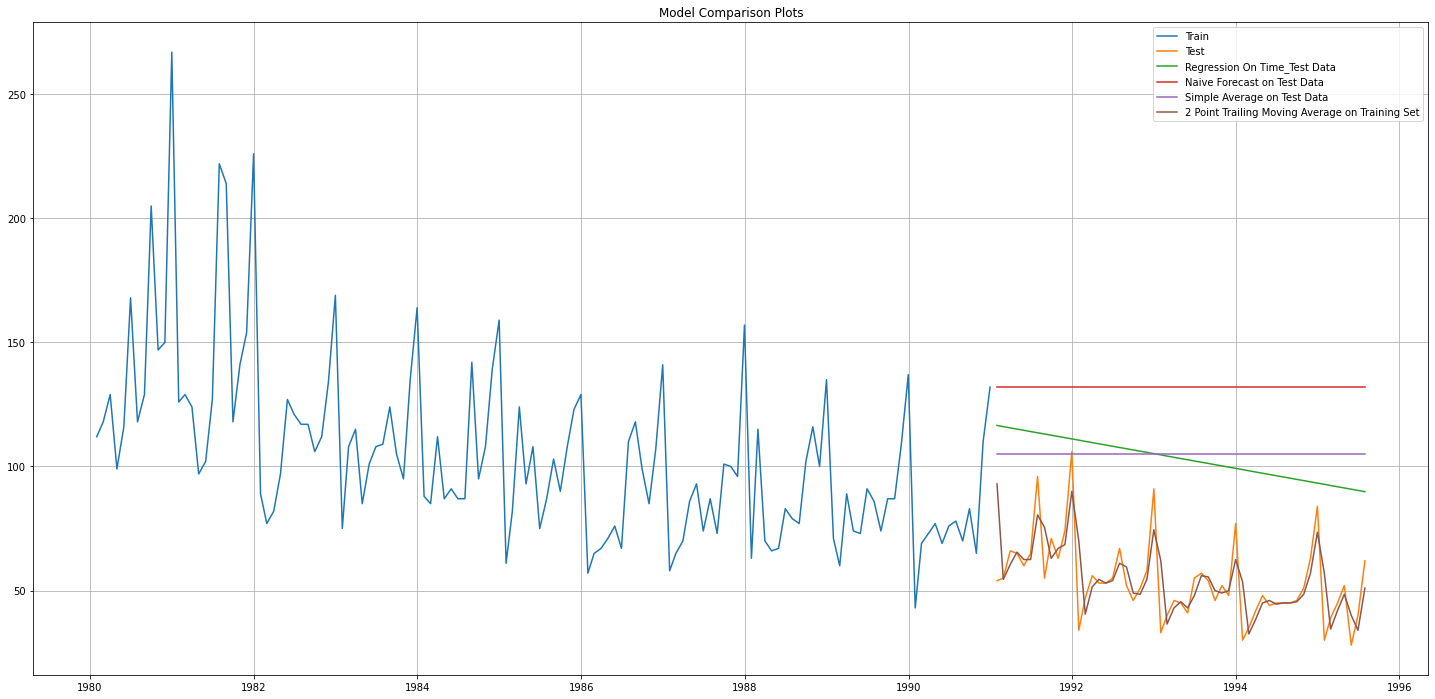

In [123]:
## Plotting on both Training and Test data

plt.figure(figsize=(25,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [124]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDF1.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.951007
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.455221
6pointTrailingMovingAverage,14.572009
9pointTrailingMovingAverage,14.731209
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",15.715112
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",21.045505
"Alpha=0.098,SimpleExponentialSmoothing",36.816889
RegressionOnTime,51.451050
"Alpha=0.9,SES",77.159094


### Triple Exponential Smoothing and 2point Trrailing Moving Average on the entire data as they have the least RMSE.

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

#### Mentioning the Hypothesis test and going forward with adfuller test

In [185]:
from statsmodels.tsa.stattools import adfuller

In [186]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.241
DF test p-value is 0.4669420602610074
Number of lags used 13


In [187]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.161
DF test p-value is 3.028272263687806e-11
Number of lags used 12


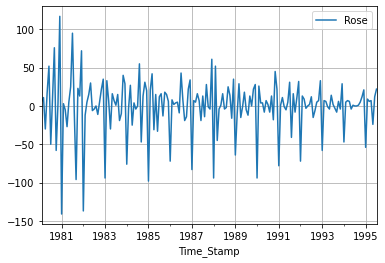

In [188]:
df.diff().dropna().plot(grid=True);

#### Checking entire data for stationarity and proceeding with ARIMA models.

In [189]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [127]:
train    =   df[df.index < '1991'] 
test     =   df[df.index >='1991']

In [128]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [129]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [130]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


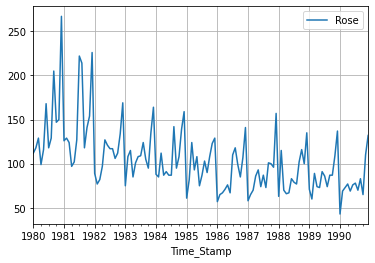

In [131]:
train.plot(grid=True);

In [134]:
from statsmodels.tsa.stattools import adfuller

In [135]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047064
Number of lags used 13


In [136]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782412e-08
Number of lags used 12


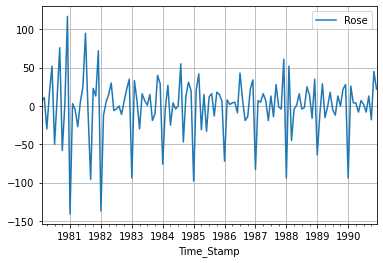

In [137]:
train.diff().dropna().plot(grid=True);

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA MODEL

In [139]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [140]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [141]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [142]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695412
15,"(3, 1, 3)",1278.667917
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [143]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Wed, 30 Nov 2022   AIC                           1274.695
Time:                        21:30:55   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


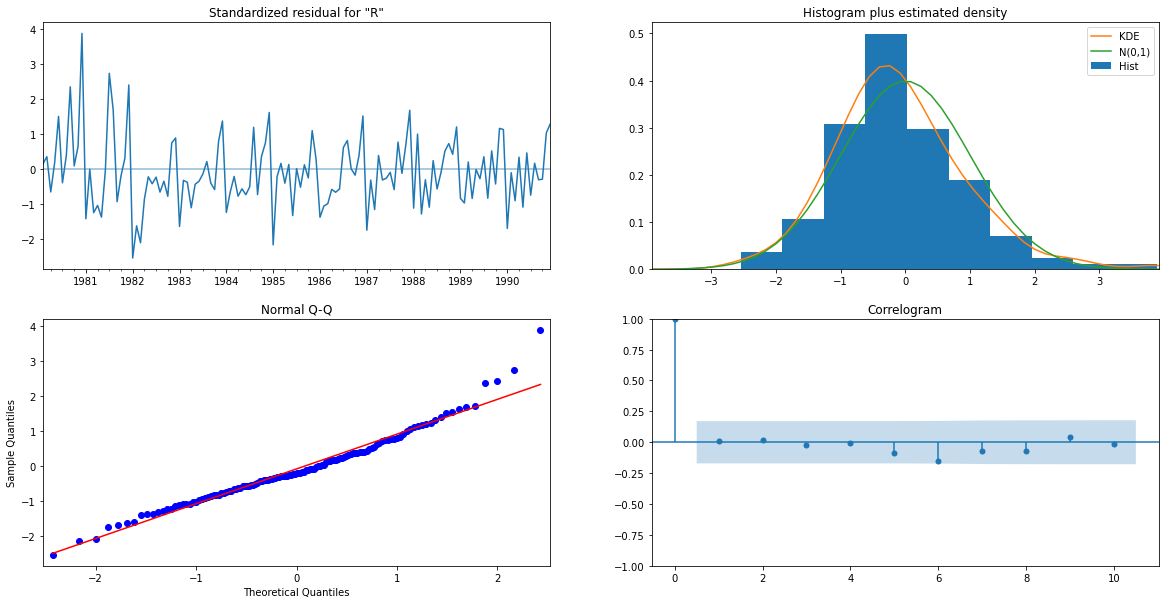

In [144]:
results_auto_ARIMA.plot_diagnostics(figsize=(20,10));

In [145]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [146]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [147]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.833569196278205 
MAPE: 75.91612583889263


In [148]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA with least AIC(2,1,3)'])

resultsDf

,RMSE,MAPE
"ARIMA with least AIC(2,1,3)",36.833569,75.916126


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [149]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

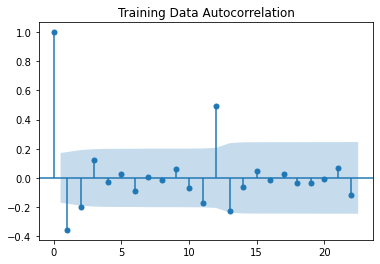

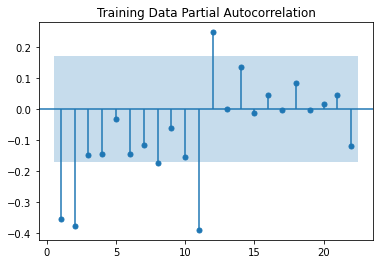

In [150]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [151]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Wed, 30 Nov 2022   AIC                           1281.871
Time:                        21:30:57   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


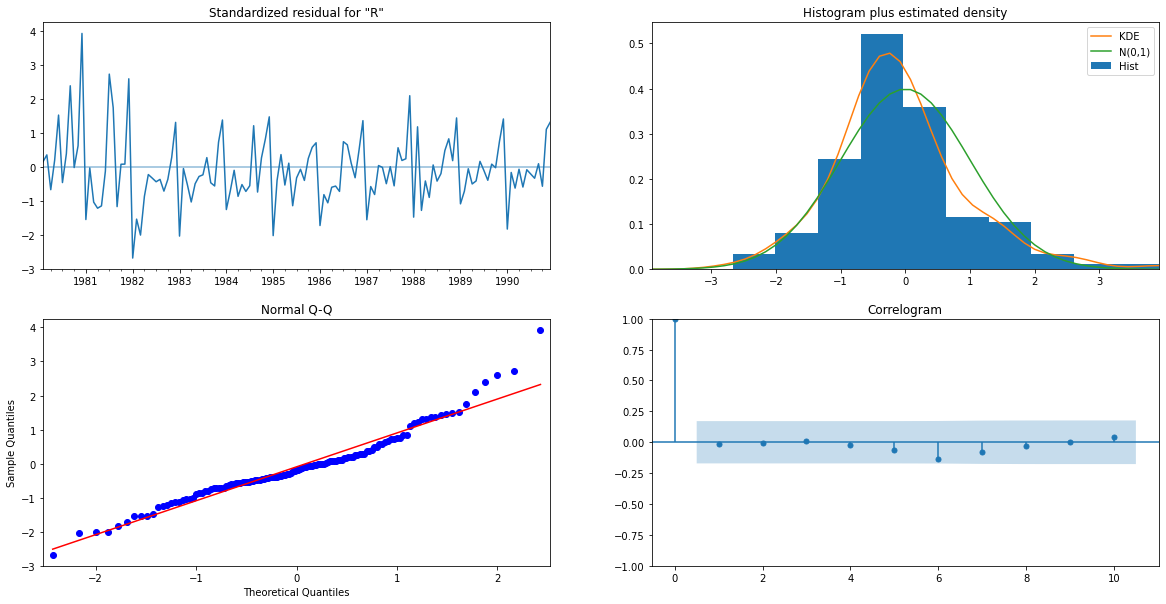

In [152]:
results_manual_ARIMA.plot_diagnostics(figsize=(20,10));

In [153]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [154]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.891831521510426 
MAPE: 76.13349552994617


In [155]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA based on ACF&PACF plots(0,1,3)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA with least AIC(2,1,3)",36.833569,75.916126
"ARIMA based on ACF&PACF plots(0,1,3)",36.891832,76.133496


#### SARIMA Models based on Least AIC and ACF& PACF plots

### SARIMA

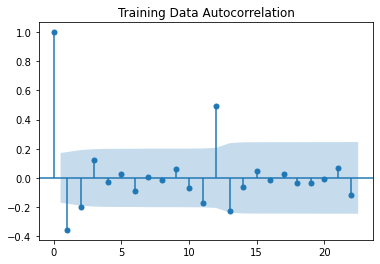

In [156]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [157]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [158]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [159]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827401
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625194
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149145
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.309326672227
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124334
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515201
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442633377
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206424758
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139516
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425052390726
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8803562293165
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.383254802954
SARIMA(0, 1, 1)x(0, 0, 2, 6) - 

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627386997
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607523663
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.1763956336662
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.1258778648452
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.8068385701052
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521337977802
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.1740913829686
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146685
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691921440698
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033340168
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.4894643085994
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.42174925109
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283274244069
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103218284125
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8723967349948
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457841924
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798921135
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2203593708753
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:9

In [160]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744298
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582105
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205612
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [161]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -466.830
Date:                           Wed, 30 Nov 2022   AIC                            955.659
Time:                                   21:36:12   BIC                            985.264
Sample:                               01-31-1980   HQIC                           967.665
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2218      0.488     -0.455      0.649      -1.178       0.735
ma.L1         -0.5408    382.430     -0.001

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


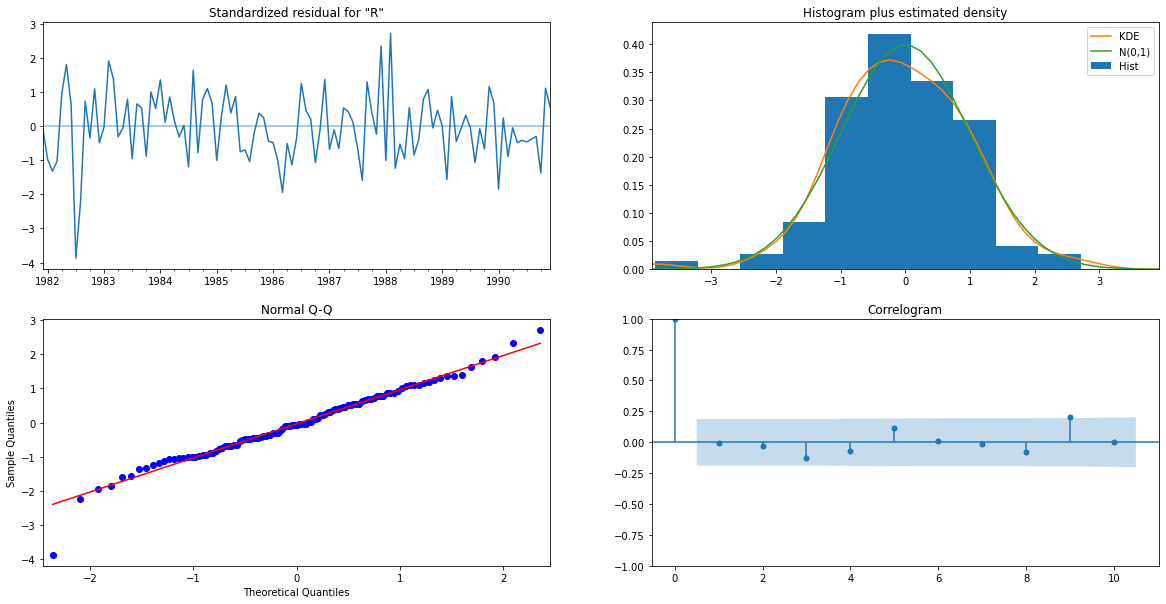

In [162]:
results_auto_SARIMA.plot_diagnostics(figsize=(20,10));

In [163]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [164]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,65.331934,17.042617,31.929018,98.734851
1991-02-28,70.709371,17.550879,36.310279,105.108462
1991-03-31,78.750927,17.549355,44.354824,113.147030
1991-04-30,76.941373,17.547536,42.548835,111.333911
1991-05-31,78.352949,17.547792,43.959908,112.745990


In [165]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 31.132758942446863 
MAPE: 63.705877109387124


In [166]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA with lowest AIC(1,1,3)(3,0,3,6)'])
temp_resultsDf

,RMSE,MAPE
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",31.132759,63.705877


In [167]:
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA with least AIC(2,1,3)",36.833569,75.916126
"ARIMA based on ACF&PACF plots(0,1,3)",36.891832,76.133496
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",31.132759,63.705877


### SARIMA based on ACF & PACF plots

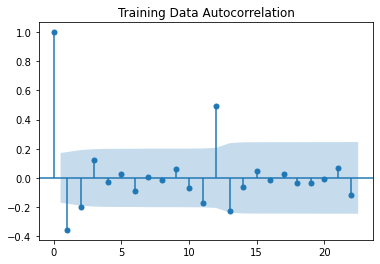

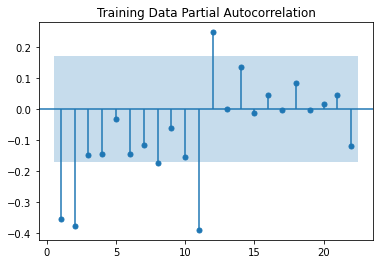

In [168]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [169]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -487.076
Date:                           Wed, 30 Nov 2022   AIC                            994.152
Time:                                   21:36:19   BIC                           1021.065
Sample:                               01-31-1980   HQIC                          1005.066
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1009      0.110      0.917      0.359      -0.115       0.317
ar.L2          0.6256      0.115      5.446

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


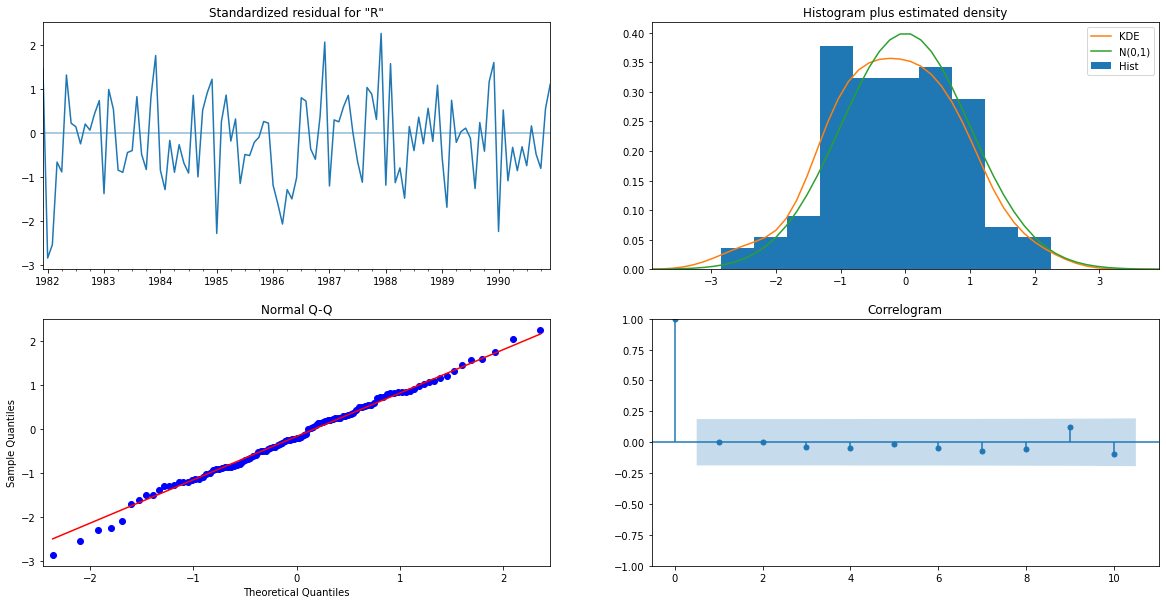

In [170]:
results_manual_SARIMA.plot_diagnostics(figsize=(20,10))
plt.show()

In [171]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [172]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 29.740758399675286 
MAPE: 60.44463461346228


In [173]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA with least AIC(2,1,3)",36.833569,75.916126
"ARIMA based on ACF&PACF plots(0,1,3)",36.891832,76.133496
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",31.132759,63.705877
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",29.740758,60.444635


In [174]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



,RMSE,MAPE
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",29.740758,60.444635
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",31.132759,63.705877
"ARIMA with least AIC(2,1,3)",36.833569,75.916126
"ARIMA based on ACF&PACF plots(0,1,3)",36.891832,76.133496


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [175]:
resultsDF2= resultsDf.copy()
resultsDF2

,RMSE,MAPE
"ARIMA with least AIC(2,1,3)",36.833569,75.916126
"ARIMA based on ACF&PACF plots(0,1,3)",36.891832,76.133496
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",31.132759,63.705877
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",29.740758,60.444635


In [183]:
Results_Rose= pd.concat([resultsDF2,resultsDF1])
Results_Rose

,RMSE,MAPE,Test RMSE
"ARIMA with least AIC(2,1,3)",36.833569,75.916126,NaN
"ARIMA based on ACF&PACF plots(0,1,3)",36.891832,76.133496,NaN
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",31.132759,63.705877,NaN
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",29.740758,60.444635,NaN
"Alpha=0.098,SimpleExponentialSmoothing",NaN,NaN,36.816889
"Alpha=0.9,SES",NaN,NaN,77.159094
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",NaN,NaN,15.715112
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",NaN,NaN,265.591922
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",NaN,NaN,21.045505
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",NaN,NaN,10.951007


In [184]:
Results_Rose.sort_values(by='Test RMSE',ascending =True)

,RMSE,MAPE,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",NaN,NaN,10.951007
2pointTrailingMovingAverage,NaN,NaN,11.529409
4pointTrailingMovingAverage,NaN,NaN,14.455221
6pointTrailingMovingAverage,NaN,NaN,14.572009
9pointTrailingMovingAverage,NaN,NaN,14.731209
"Alpha =0.017, Beta= 3.23,DoubleExponentialSmoothing",NaN,NaN,15.715112
"Alpha:0.065 ,Beta:0.051,Gamma:3.87,TripleExponentialSmoothing",NaN,NaN,21.045505
"Alpha=0.098,SimpleExponentialSmoothing",NaN,NaN,36.816889
RegressionOnTime,NaN,NaN,51.451050
"Alpha=0.9,SES",NaN,NaN,77.159094


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [206]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.03,
                                                                 smoothing_trend=0.04,
                                                                 smoothing_seasonal=0.03)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [207]:
from sklearn.metrics import mean_squared_error

In [208]:
RMSE_fullmodel1 = mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 17.032295757819536


In [211]:
prediction_1 = fullmodel1.forecast(steps=12)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


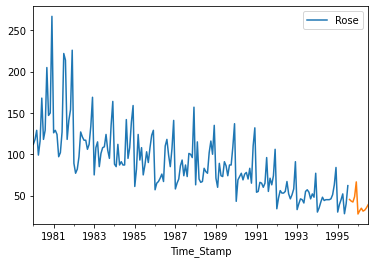

In [212]:
df.plot()
prediction_1.plot();

In [213]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,11.905332,45.270739,78.636147
1995-09-30,9.887802,43.253209,76.618617
1995-10-31,8.821808,42.187216,75.552623
1995-11-30,15.228159,48.593566,81.958974
1995-12-31,33.166472,66.531879,99.897287


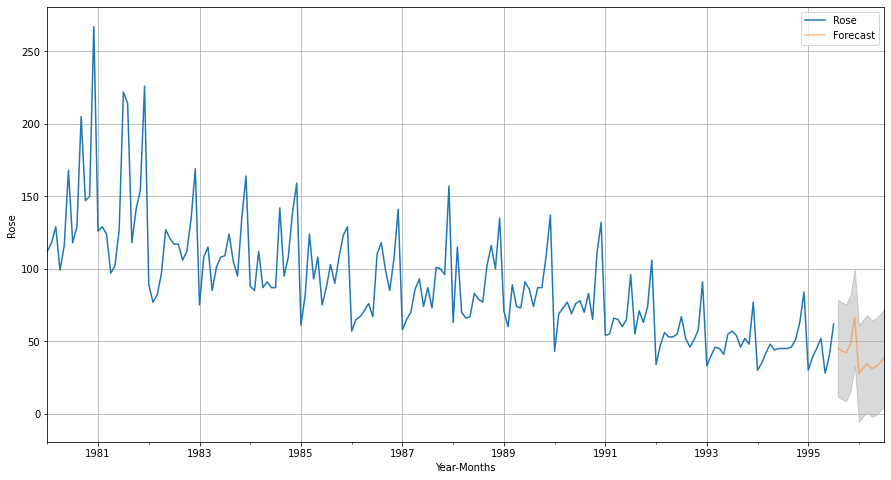

In [214]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SARIMA with lowest AIC score tested on the full data to get prediction for 12 months

In [226]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -680.060
Date:                           Thu, 01 Dec 2022   AIC                           1382.119
Time:                                   17:29:05   BIC                           1416.218
Sample:                               01-31-1980   HQIC                          1395.962
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1345      0.363     -0.371      0.711      -0.846       0.577
ma.L1         -0.5949      0.366     -1.628

In [227]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [228]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,49.897419,15.004483,20.489173,79.305664
1995-09-30,46.572766,15.543947,16.107190,77.038342
1995-10-31,51.519837,15.574020,20.995318,82.044355
1995-11-30,56.249590,15.625709,25.623763,86.875417
1995-12-31,70.508784,15.674048,39.788214,101.229354


In [229]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.650564375575094


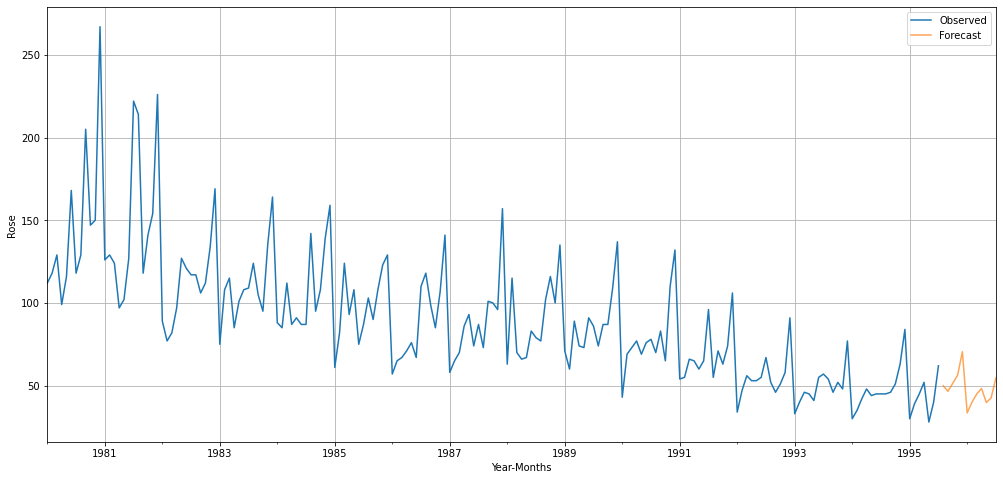

In [230]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, figsize=(17,8))

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

#### SARIMA with on the bases of ACF and PACF plots tested on the full data to get prediction for 12 months

In [220]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -712.946
Date:                           Thu, 01 Dec 2022   AIC                           1445.892
Time:                                   17:27:09   BIC                           1476.890
Sample:                               01-31-1980   HQIC                          1458.476
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0928      0.084      1.107      0.268      -0.072       0.257
ar.L2          0.6382      0.087      7.371

In [221]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [222]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,48.604186,18.224530,12.884763,84.323609
1995-09-30,46.172302,18.474792,9.962376,82.382228
1995-10-31,47.402843,18.493701,11.155856,83.649831
1995-11-30,59.509164,18.495264,23.259112,95.759216
1995-12-31,62.223377,18.495793,25.972289,98.474466


In [223]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 34.65732247741161


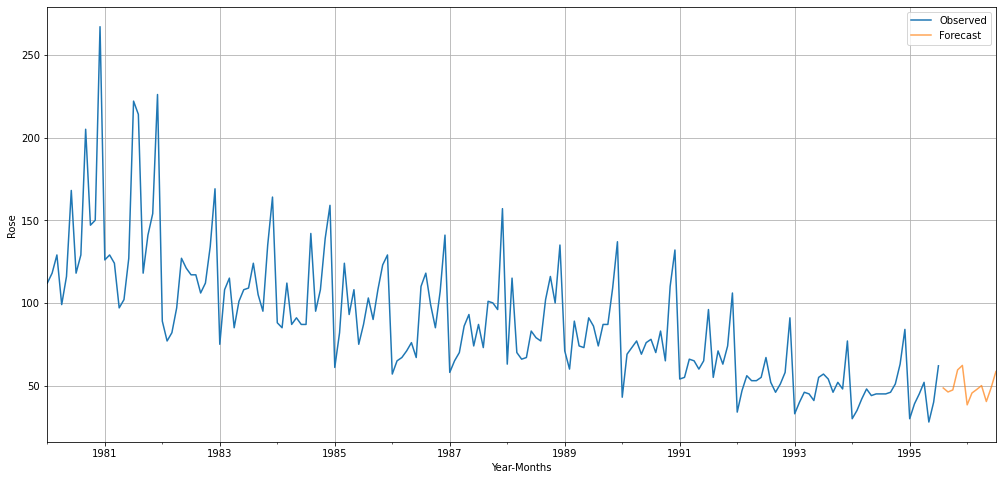

In [224]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, figsize=(17,8))

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();